In [1]:
import math
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

# VARIAVEIS INICIAIS
x1_line = -2
sigma1 = 1
p1 = 1
q1 = 1

x2_line = 2
sigma2 = 1
p2 = 1
q2 = 1
# ----------------------
alpha = 0.1
adjusts = 4
error_array = []
range_start = -2
range_end = 2
# ----------------------


def get_Wn(x, x_line, sigma):
    return math.exp((-1/2)*(((x-x_line)/sigma)**2))


def get_Yn(p, x, q):
    return p*x+q


def get_Y(x, p1, p2, q1, q2, x1_line, x2_line, sigma1, sigma2):
    y1 = get_Yn(p1, x, q1)
    y2 = get_Yn(p2, x, q2)

    w1 = get_Wn(x, x1_line, sigma1)
    w2 = get_Wn(x, x2_line, sigma2)

    y = (w1*y1 + w2*y2)/(w1+w2)
    return y


def get_error(y, y_goal):
    return ((y - y_goal) ** 2) / 2


def get_derivative_of_p(y, y_goal, w1, w2, w_1_or_2):
    return (y - y_goal) * (w_1_or_2 / (w1 + w2)) * x


def get_derivative_of_q(y, y_goal, w1, w2, w_1_or_2):
    return (y - y_goal) * (w_1_or_2 / (w1 + w2))


def get_derivative_of_X_line_1(y, w1, w2, y1, y2, sigma1, yd):
    return (y - yd)*w2*((y1-y2)/(w1+w2)**2)*w1*((x-x1_line)/(sigma1**2))


def get_derivative_of_X_line_2(y, w1, w2, y1, y2, sigma2, yd):
    return (y - yd)*w1*((y2-y1)/(w1+w2)**2)*w2*((x-x2_line)/(sigma2**2))


def get_derivative_of_Sigma_1(y, w1, w2, y1, y2, sigma1, yd):
    return (y - yd)*w2*((y1-y2)/(w1+w2)**2)*w1*((x-x1_line)**2/(sigma1**3))


def get_derivative_of_Sigma_2(y, w1, w2, y1, y2, sigma2, yd):
    return (y - yd)*w1*((y2-y1)/(w1+w2)**2)*w2*((x-x2_line)**2/(sigma2**3))


def gradient_step(y, y_goal, w1, w2, y1, y2):
    global p1, p2, q1, q2, x1_line, x2_line, sigma1, sigma2

    p1 = p1 - alpha * get_derivative_of_p(y, y_goal, w1, w2, w1)
    p2 = p2 - alpha * get_derivative_of_p(y, y_goal, w1, w2, w2)

    q1 = q1 - alpha * get_derivative_of_q(y, y_goal, w1, w2, w1)
    q2 = q2 - alpha * get_derivative_of_q(y, y_goal, w1, w2, w2)

    x1_line = x1_line - alpha * \
        get_derivative_of_X_line_1(y, w1, w2, y1, y2, sigma1, y_goal)
    x2_line = x2_line - alpha * \
        get_derivative_of_X_line_2(y, w1, w2, y1, y2, sigma2, y_goal)

    sigma1 = sigma1 - alpha * \
        get_derivative_of_Sigma_1(y, w1, w2, y1, y2, sigma1, y_goal)
    sigma2 = sigma2 - alpha * \
        get_derivative_of_Sigma_2(y, w1, w2, y1, y2, sigma2, y_goal)


def goal_function(x):
    return x**2


# main

error_list = []

x_array = np.arange(start=range_start, stop=range_end, step=0.1)
gauss_1 = [get_Wn(x, x1_line, sigma1) for x in x_array]
gauss_2 = [get_Wn(x, x2_line, sigma2) for x in x_array]
goal_y_list = list(map(goal_function, x_array))

for i in range(0, 1000):
    y_array = [get_Y(x, p1, p2, q1, q2, x1_line, x2_line,
                     sigma1, sigma2) for x in x_array]
    
    if(i == 50):
        second_y_array = y_array

    for j in range(adjusts):
        random_index = randint(0, len(x_array) - 1)
        x = x_array[random_index]
        y = y_array[random_index]
        goal_y = goal_y_list[random_index]

        w1 = get_Wn(x, x1_line, sigma1)
        w2 = get_Wn(x, x2_line, sigma2)

        y1 = get_Yn(p1, x, q1)
        y2 = get_Yn(p2, x, q2)

        gradient_step(y, goal_y, w1, w2, y1, y2)

    error = np.mean([get_error(y_array[i], goal_y_list[i])
                    for i in range(len(y_array))])
    error_list.append(error)

## Erro medio apos 1.000 iterações:

In [2]:
error_list[-1]

0.0036787120501402316

## Gaussianas

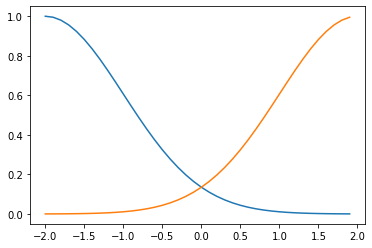

In [3]:
plt.plot(x_array, gauss_1)
plt.plot(x_array, gauss_2)

## Erro com o decorrer das iterações

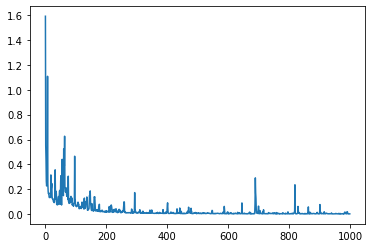

In [4]:
plt.plot([i for i in range(0, 1000)], error_list)

## Resultado

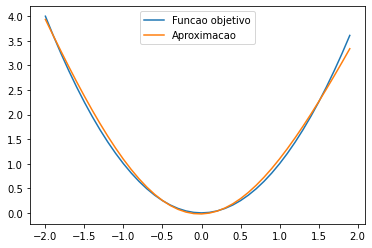

In [5]:
plt.plot(x_array, goal_y_list, label='Funcao objetivo')
plt.plot(x_array, y_array, label='Aproximacao')
plt.legend()
plt.show()